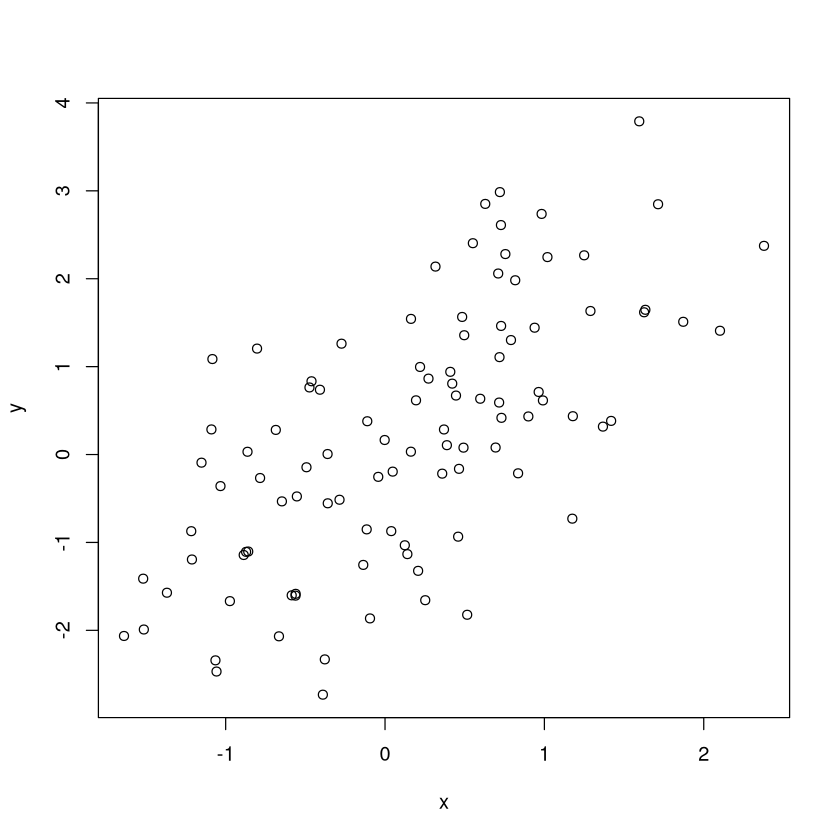

In [141]:
# Data Generating Process
x = rnorm(100)
y = x + rnorm(100,0,1)
D = cbind(x,y)
plot(D)

In [142]:
# Implement Four Fold Cross Validation
availableIndices = 1:100

i1 = sample(availableIndices, 25, replace = FALSE)
availableIndices <- availableIndices[!availableIndices %in% i1]

i2 = sample(availableIndices, 25, replace = FALSE)
availableIndices <- availableIndices[!availableIndices %in% i2]

i3 = sample(availableIndices, 25, replace = FALSE)
availableIndices <- availableIndices[!availableIndices %in% i3]

i4 = availableIndices

d1 = D[i1,]
d2 = D[i2,]
d3 = D[i3,]
d4 = D[i4,]

# fourFoldCrossValidSets <- function(Data, availableIndices = 1:100) {
#     i1 = sample(availableIndices, 25, replace = FALSE)
#     availableIndices <- availableIndices[!availableIndices %in% i1]

#     i2 = sample(availableIndices, 25, replace = FALSE)
#     availableIndices <- availableIndices[!availableIndices %in% i2]

#     i3 = sample(availableIndices, 25, replace = FALSE)
#     availableIndices <- availableIndices[!availableIndices %in% i3]

#     i4 = availableIndices
#     s1 = Data[i1,]
#     s2 = Data[i2,]
#     s3 = Data[i3,]
#     s4 = Data[i4,]
#     return(cbind(s1, s2, s3, s4))
# }

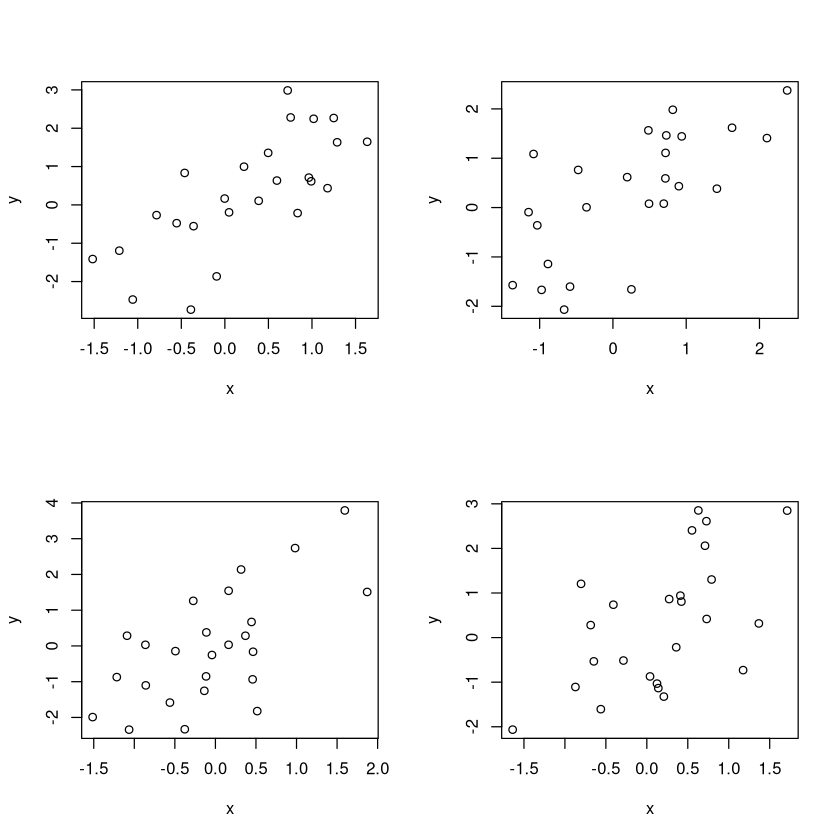

In [143]:
# Show plots of each data subset
par(mfrow = c(2, 2))
plot(d1)
plot(d2)
plot(d3)
plot(d4)

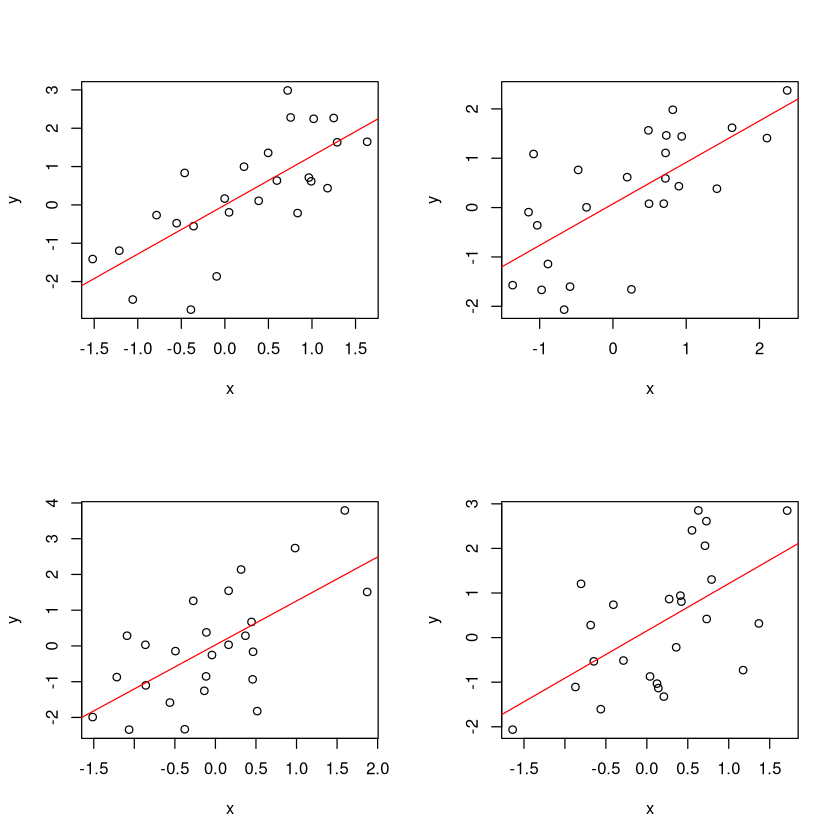

In [144]:
# Visualizing Variance of  models -- part 1
# Implement linear models for each data subset
m1 = lm(d1[,2]~d1[,1])
m2 = lm(d2[,2]~d2[,1])
m3 = lm(d3[,2]~d3[,1])
m4 = lm(d4[,2]~d4[,1])

# Show linear models
par(mfrow = c(2, 2))
plot(d1)
abline(m1, col = 'red')
plot(d2)
abline(m2, col = 'red')
plot(d3)
abline(m3, col = 'red')
plot(d4)
abline(m4, col = 'red')

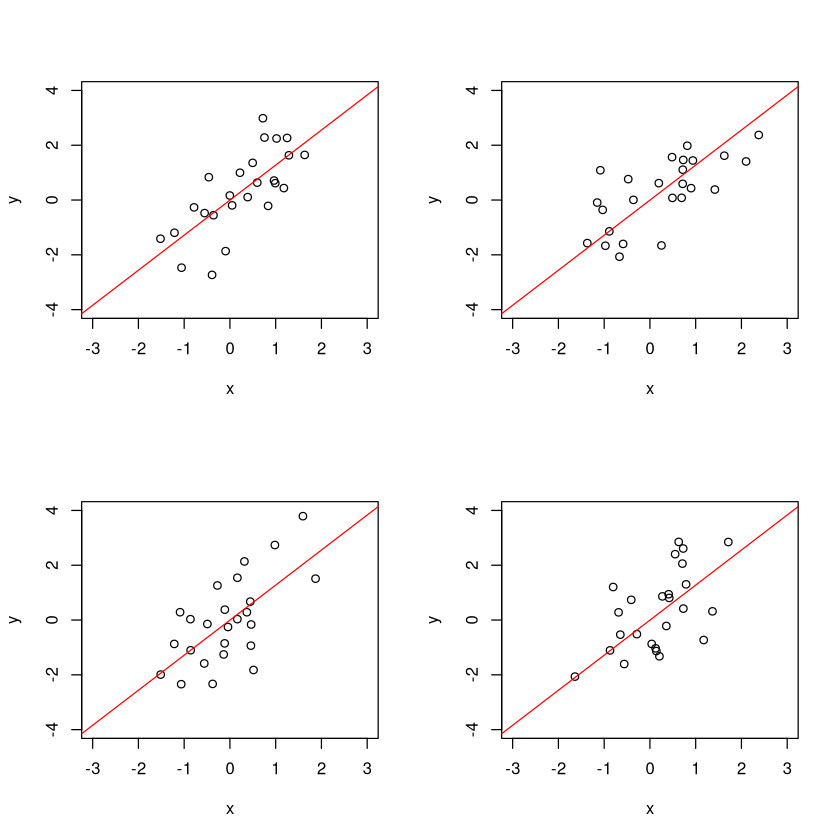

In [197]:
# Visualizing Variance of models -- part 2
# How well does the model trained on d1 generalize to the other data sets?
par(mfrow = c(2, 2))
plot(d1,xlim= c(-3,3), ylim=c(-4,4))
abline(m1, col = 'red')
plot(d2, xlim= c(-3,3), ylim=c(-4,4))
abline(m1, col = 'red')
plot(d3, xlim= c(-3,3), ylim=c(-4,4))
abline(m1, col = 'red')
plot(d4, xlim= c(-3,3), ylim=c(-4,4))
abline(m1, col = 'red')

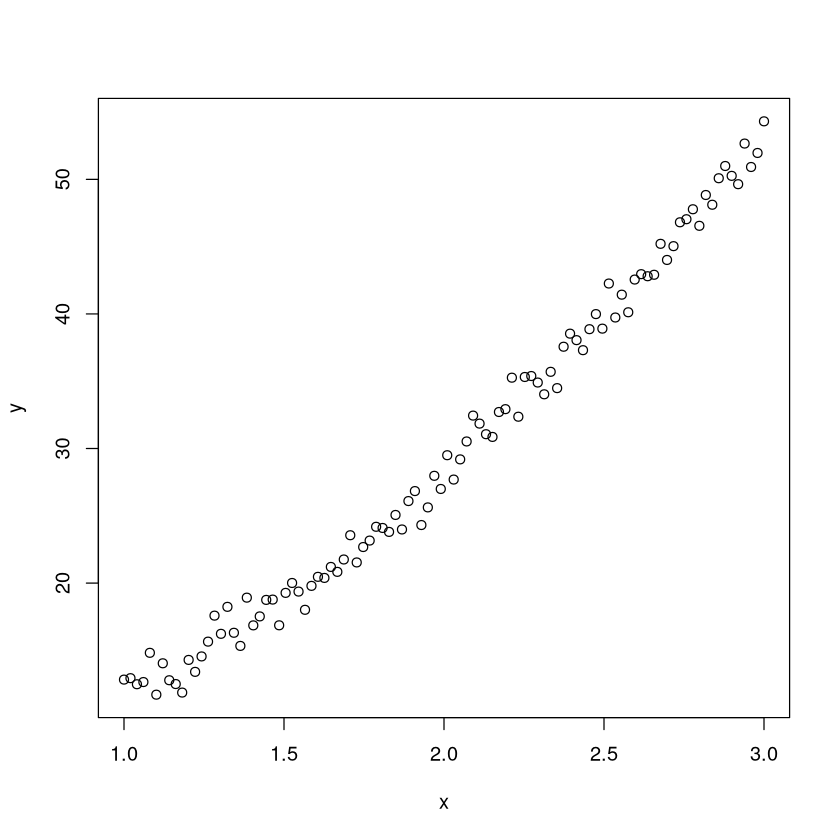

In [170]:
# Quadratic data generating process
x=seq(1, 3, length.out = 100)
y=5*x^2+x+6+rnorm(100)
D_q = cbind(x,y)
plot(D_q)

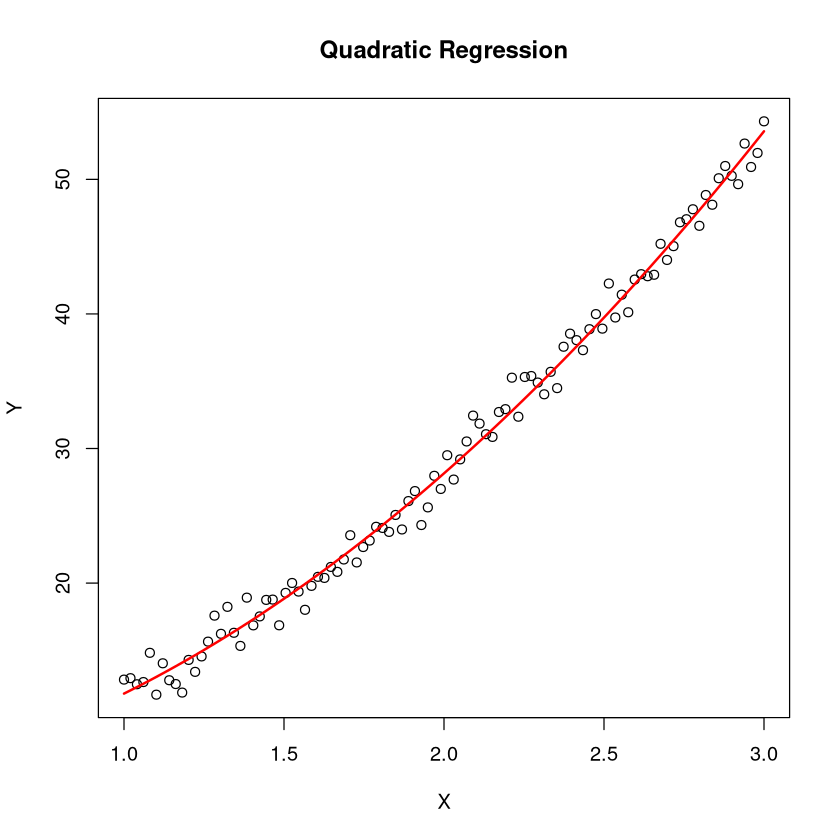

In [182]:
# Visualizing bias of models -- part 1
# Given this quadratic data generating process a quadratic model fits well
qm <- lm(y ~ poly(x, 2, raw = TRUE))
plot(x, y, main = "Quadratic Regression", xlab = "X", ylab = "Y")
lines(x, predict(qm), col = "red", lwd = 2)

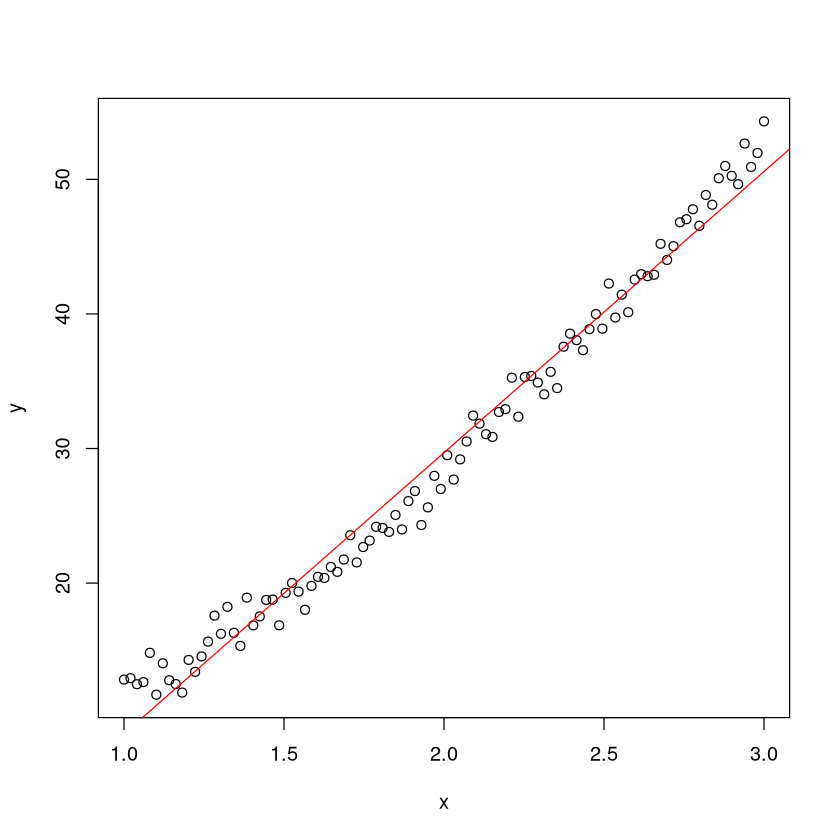

In [183]:
# Visualizing bias of models -- part 2
# The linear model still fits quite well. Bias is an error from erroneous assumptions in the learning algorithm
linm <- lm(y ~ x)
plot(D_q)
abline(linm, col = 'red')

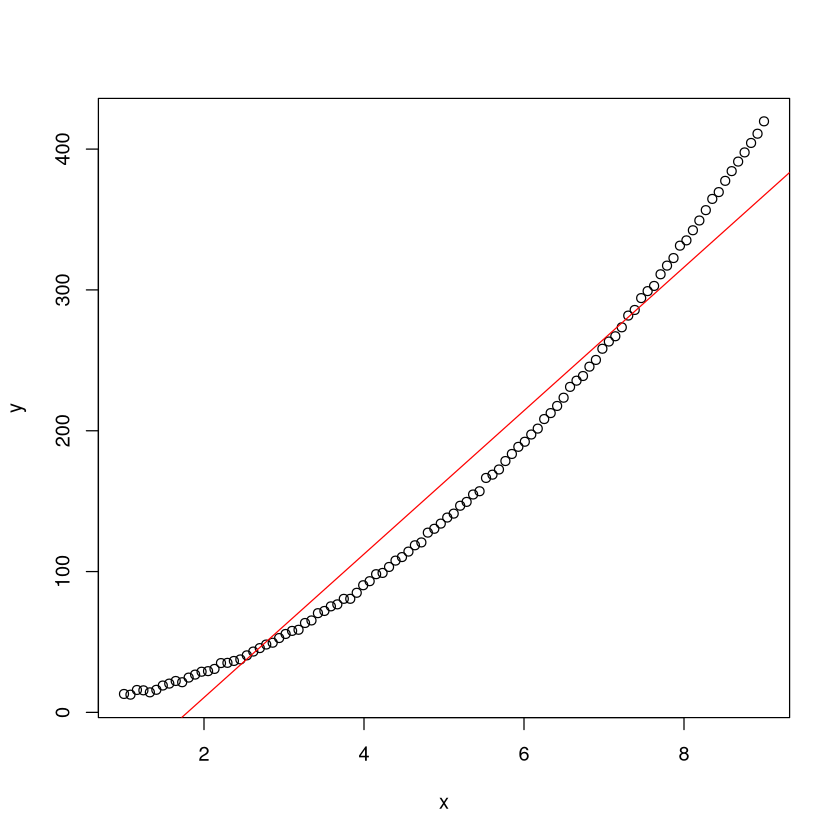

In [184]:
# Visualizing bias of models -- part 3
# A more distinct data generating process
x=seq(1, 9, length.out = 100)
y=5*x^2+x+6+rnorm(100)
D_q = cbind(x,y)
# The linear model has an inability to capture the quadratic relationship. This is the bias.
linm <- lm(y ~ x)
plot(D_q)
abline(linm, col = 'red')

In [186]:
runSimulation <- function(maxValue, sampleSize){ 
    # Conducts simulation to compare MSE of linear and quadratic models
    x=runif(100,0,maxValue)
    y=x^2+x+1+rnorm(100)
    w=x^2
    plot(x,y)
    indices=sample(1:100,sampleSize,replace=F)
    LM=lm(y[indices]~x[indices])
    QM=lm(y[indices]~x[indices]+w[indices])
    le=numeric(10000)
    qe=numeric(10000)
    # Calculate MSE for both models
    for (i in 1:10000) {j=sample(1:100,1); le[i]=x[j]^2+x[j]+1+rnorm(1)-LM$coefficients[1]-LM$coefficients[2]*x[j]}
    for (i in 1:10000) {j=sample(1:100,1); qe[i]=x[j]^2+x[j]+1+rnorm(1)-QM$coefficients[1]-QM$coefficients[2]*x[j]-QM$coefficients[3]*x[j]^2}
    print(mean(le^2))
    print(mean(qe^2))
}

[1] 1.074711
[1] 1.059023


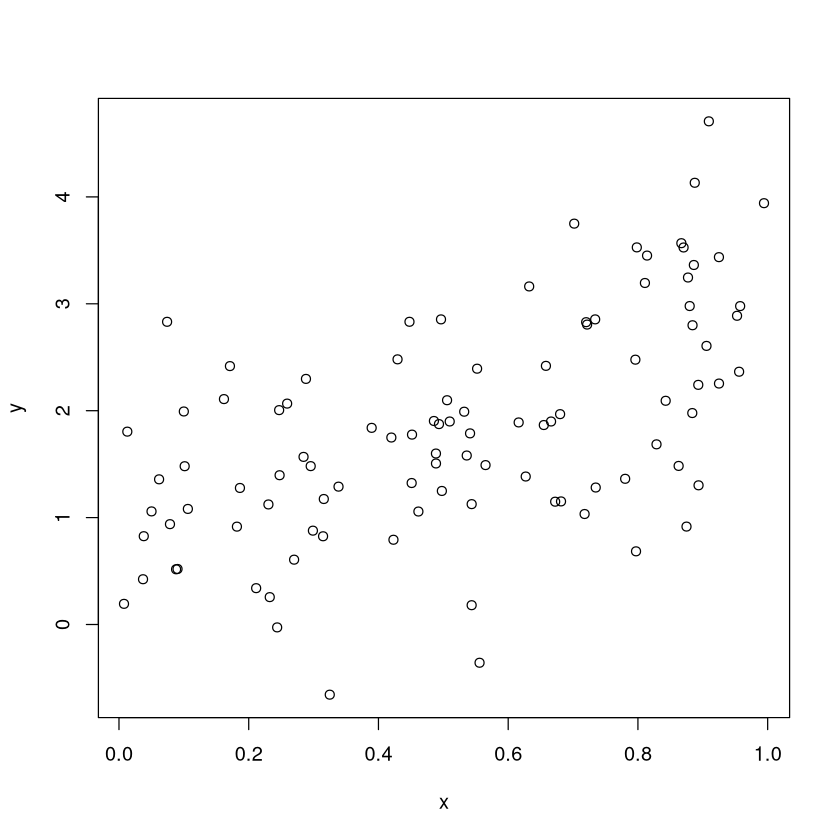

In [195]:
# Bias Variance tradeoff --part 1
# Similar performance -- small sample size and small maximum value of the data generating process
runSimulation(maxValue = 1, sampleSize = 5)

[1] 1.428745
[1] 8.833224


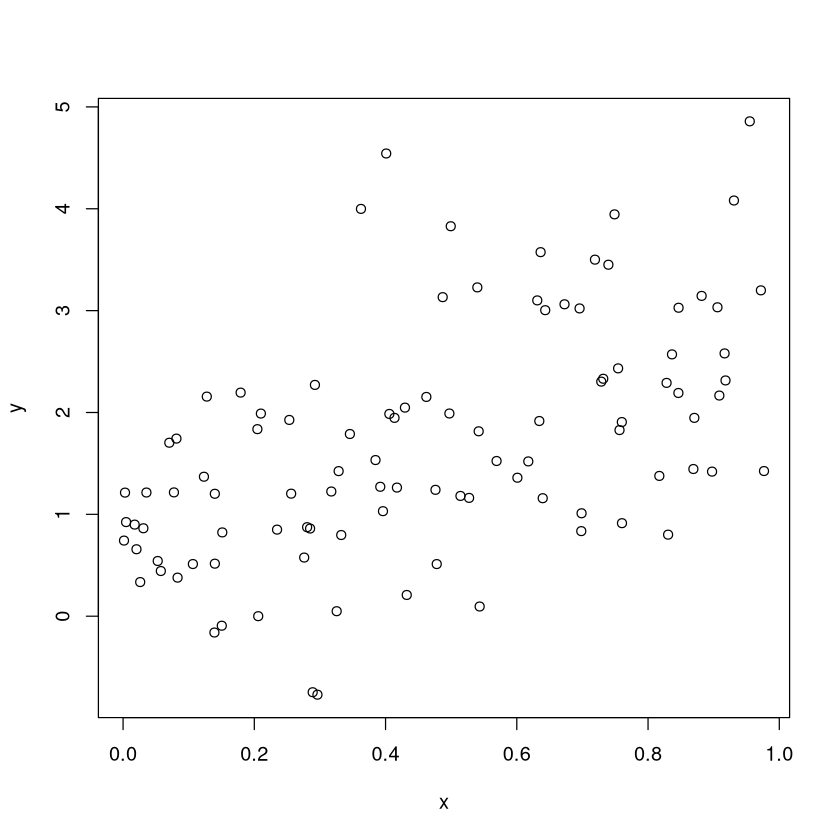

In [193]:
# Bias Variance tradeoff --part 2
# Linear model outperforms quadratic -- smaller sample size and small maximum value of the data generating process
runSimulation(maxValue = 1, sampleSize = 3)

[1] 2.374103
[1] 1.293617


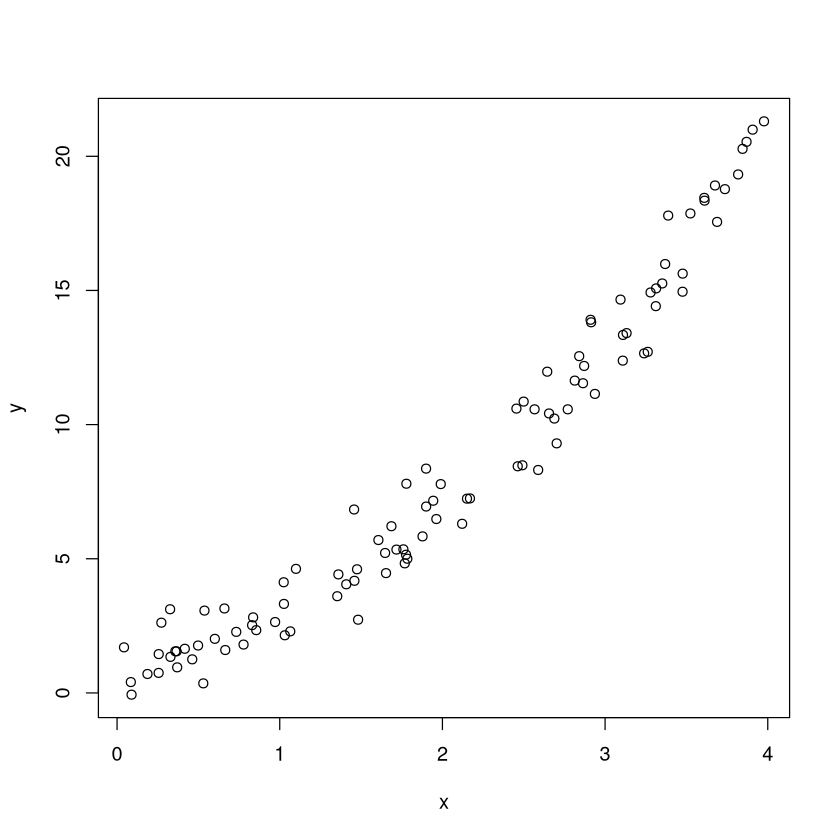

In [191]:
# Bias Variance tradeoff --part 3
# Quadratic model outperforms Linear -- reasonable sample size and slightly larger maximum value
runSimulation(maxValue = 4, sampleSize = 7)